In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from python_code.utils import wrap_matrix

## Defining useful functions

In [14]:
def compute_error(A, B):
    alpha = - np.sum(A - B) / (A.shape[0] * B.shape[1])
    error = B - (A + alpha * np.ones((A.shape[0], A.shape[1])))
    return error    
    
def scale_image(X):
    return X - np.mean(X)

## Running the experiments
If you have not done so already, you can run the experiments with the next cell

In [15]:
from final_script import run_exp
run_exp()

## Visualize experiment on real image

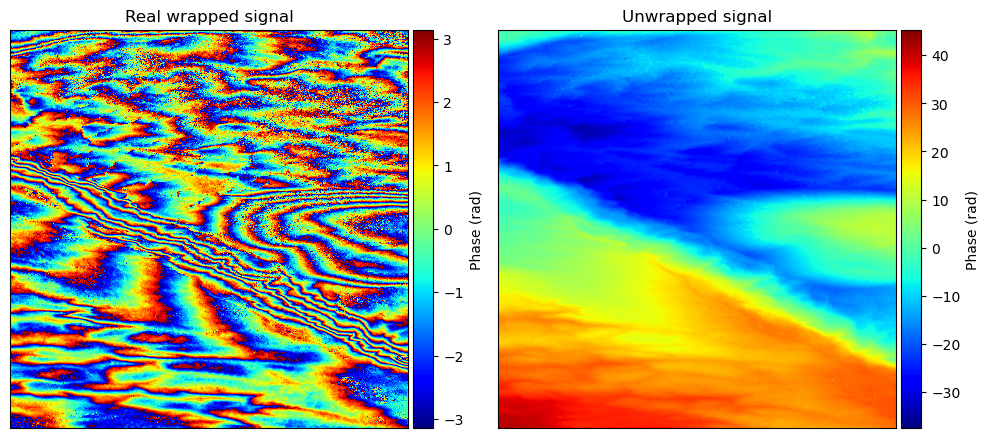

In [8]:
cmap="jet"
noise_level = "real_goldstein"
location = "arz_lebanon"


path_results = os.path.join(os.getcwd(), "results", location, noise_level)
path_data = os.path.join(os.getcwd(), "data", location, "npy_files")



X_wrapped = scale_image(np.load(os.path.join(path_data, "real_goldstein.npy")))
U = np.load(os.path.join(path_results, "U.npy"))
    
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 12))

im1 = ax1.imshow(X_wrapped, cmap=cmap, interpolation="nearest", vmin=-np.pi, vmax=np.pi)
im2 = ax2.imshow(U, cmap=cmap)
divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)

cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)

ax1.title.set_text("Real wrapped signal")
ax2.title.set_text("Unwrapped signal")

fig.colorbar(im1, cax=cax1, orientation='vertical', label="Phase (rad)")
fig.colorbar(im2, cax=cax2, orientation='vertical', label="Phase (rad)")

for ax in [ax1, ax2]:
        ax.set_yticks([])
        ax.set_xticks([])
fig.tight_layout()
plt.show()

## Visualize experiment on simulated image

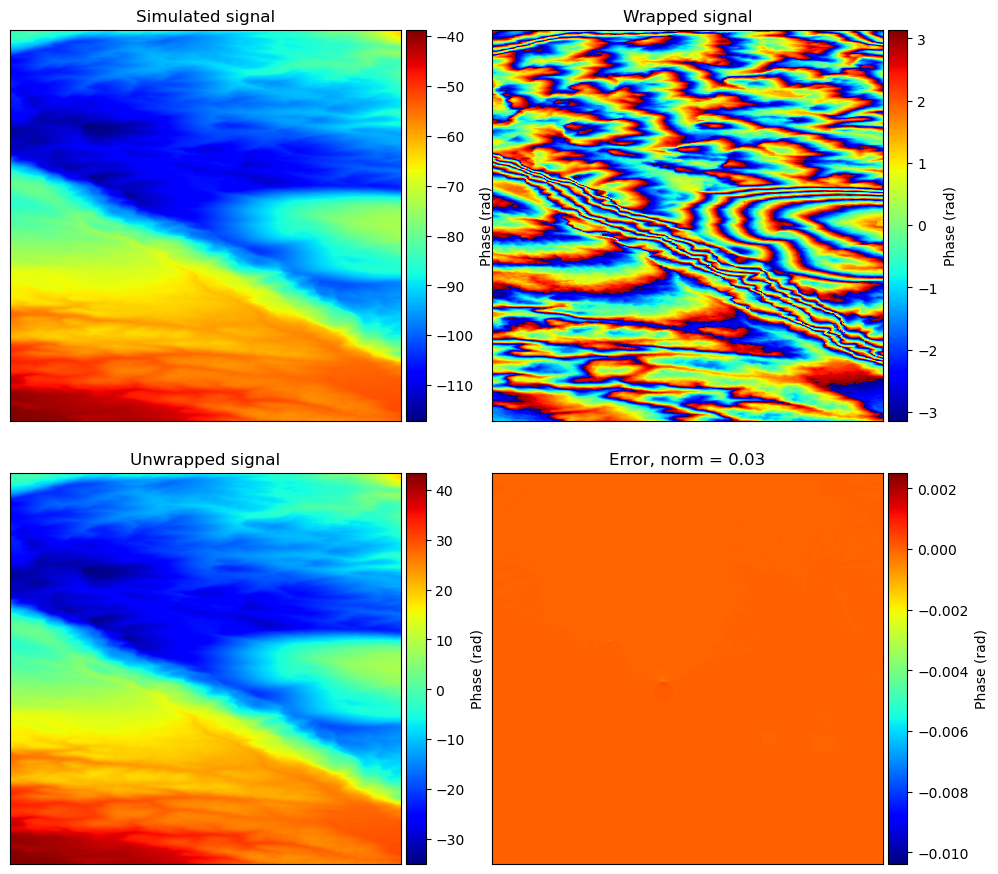

In [12]:
cmap="jet"
noise_level = "noiseless"
location = "arz_lebanon"


path_results = os.path.join(os.getcwd(), "results", location, noise_level)
path_data = os.path.join(os.getcwd(), "data", location, "npy_files")



X_original = np.load(os.path.join(path_data, "simu_unwrapped.npy"))
X_wrapped = wrap_matrix(X_original)
U = np.load(os.path.join(path_results, "U.npy"))
error = compute_error(U, X_original)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 9))

im1 = ax1.imshow(X_original, cmap=cmap)
im2 = ax2.imshow(X_wrapped, cmap=cmap, interpolation="nearest", vmin=-np.pi, vmax=np.pi)
im3 = ax3.imshow(U, cmap=cmap)
im4 = ax4.imshow(error, cmap=cmap)
divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)
divider3 = make_axes_locatable(ax3)
divider4 = make_axes_locatable(ax4)

cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
cax3 = divider3.append_axes('right', size='5%', pad=0.05)
cax4 = divider4.append_axes('right', size='5%', pad=0.05)

ax1.title.set_text("Simulated signal")
ax2.title.set_text("Wrapped signal")
ax3.title.set_text("Unwrapped signal")
ax4.title.set_text("Error, norm = {0:.2f}".format(np.linalg.norm(error)))

fig.colorbar(im1, cax=cax1, orientation='vertical', label="Phase (rad)")
fig.colorbar(im2, cax=cax2, orientation='vertical', label="Phase (rad)")
fig.colorbar(im3, cax=cax3, orientation='vertical', label="Phase (rad)")
fig.colorbar(im4, cax=cax4, orientation='vertical', label="Phase (rad)")

for ax in [ax1, ax2, ax3, ax4]:
        ax.set_yticks([])
        ax.set_xticks([])
fig.tight_layout()
plt.show()